## Multivariate Linear Regression from scratch

In [49]:
import model
import numpy as np
import pandas as pd
import matplotlib as plot
data = model.data

In [5]:
data.drop("daytime", axis=1, inplace=True)
data.head()

sourceid  dstid  mean_travel_time  year  quarter  weekend  pair_day_mean  \
0        42     30            850.67  2016        1        0     919.659000   
1       143    141            207.45  2016        1        0     245.911000   
2        22     25            409.74  2016        1        0     524.030500   
3        28     43            249.28  2016        1        0     262.669125   
4        26     63            799.16  2016        1        0     869.259500   

   daytime_AM Peak  daytime_Early Morning  daytime_Evening  daytime_Midday  \
0                0                      0                0               0   
1                1                      0                0               0   
2                0                      0                0               1   
3                0                      0                1               0   
4                0                      0                1               0   

   daytime_PM Peak  
0                1  
1                0  
2                0  
3                0  
4                0

In [15]:
# Seperate data into input and output
X = data.drop("mean_travel_time", axis=1)
y = data["mean_travel_time"]

In [21]:
# Scale / Standardized the feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
# source: https://medium.com/@pytholabs/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [27]:
# source: https://medium.com/@pytholabs/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

In [29]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
X_train = np.c_[np.ones(len(xTrain),dtype="int64"),xTrain]
X_test = np.c_[np.ones(len(xTest),dtype="int64"),xTest]
y_train = yTrain
y_test = yTest

In [56]:
# source: https://medium.com/@pytholabs/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iterations = 1000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iterations)

In [62]:
def predict(x_test,newB):
    return x_test.dot(newB)

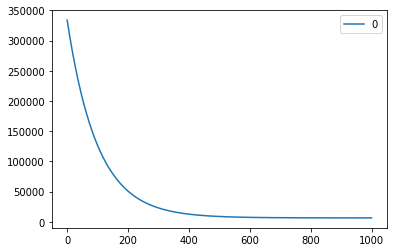

In [76]:
# plot iterations and costs
pd.DataFrame(cost_history).plot()

In [63]:
prediction = predict(X_test,newB)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test,prediction))

0.8941240188528625
